## $UAS$ $Pengolahan$ $Citra$ $Semester$ $Gasal$ $2023/2024$


* $Nama$ : ARBIL SHOFIYURRAHMAN

* $NIM$ : 210411100016

## $Pengolahan$ $Citra$ $Wajah$
adalah subdisiplin dari pengolahan citra yang khusus fokus pada teknik dan metode untuk menganalisis, mengenali, dan memanipulasi citra yang menggambarkan wajah manusia. Pengolahan citra wajah memiliki berbagai aplikasi, termasuk pengenalan wajah, verifikasi identitas, analisis ekspresi wajah, dan keamanan.

## $Principal$ $Component$ $Analysis$ $(PCA)$
 adalah teknik statistik yang digunakan untuk mengurangi dimensi dari dataset yang kompleks, dengan tetap mempertahankan informasi yang paling signifikan. PCA bertujuan untuk mengidentifikasi pola dalam data dan merepresentasikannya dalam bentuk yang lebih mudah dimengerti dan dapat diinterpretasi.

## $Klasifikasi$
adalah mengidentifikasi kategori atau kelas yang paling sesuai untuk suatu objek atau data berdasarkan karakteristik atau fitur tertentu. Tujuan utama dari algoritme klasifikasi adalah untuk membuat model yang dapat memprediksi kelas atau label suatu instance baru berdasarkan pengalaman belajar dari data yang telah diberikan sebelumnya.

## $Euclidean$ $Distance$
adalah metrik jarak yang umum digunakan dalam klasifikasi. Metrik ini mengukur jarak geometris langsung antara dua titik dalam ruang Euclidean. Dalam konteks klasifikasi, Jarak Euclidean sering digunakan untuk mengukur seberapa dekat atau jauh dua instance (data atau vektor fitur) dalam ruang fitur.

### $Memanggil$ $Data$ $dari$ $local$
keseluruhan matriks 400 x 112 x 92 merepresentasikan Data ORL yang terdiri dari 400 gambar, di mana setiap gambar memiliki resolusi 112 x 92 piksel.

In [ ]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

folder_path = r"D:/semester 5/Pengolahan Citra/ORL"

list_images = []
labels = []

folder_names = sorted(os.listdir(folder_path), key=lambda x: int(x))
for folder_name in folder_names:
    folder_full_path = os.path.join(folder_path, folder_name)

    if os.path.isdir(folder_full_path):
        label = int(folder_name)
        files = os.listdir(folder_full_path)
        # Urutkan nama file berdasarkan angka terakhir dalam nama file
        files = sorted(files, key=lambda x: int(x.split('_')[-1].split('.')[0]))

        for filename in files:
            image_path = os.path.join(folder_full_path, filename)
            image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
            list_images.append(image)
            labels.append(label)

matriks_gambar = np.array(list_images)
matriks_gambar.shape

(400, 112, 92)

Matriks gambar dengan ukuran 112 x 92 piksel untuk 400 gambar ditumpuk menjadi satu matriks besar menggunakan reshap.

In [ ]:
matriks_gambar = matriks_gambar.reshape(400, -1)
print(matriks_gambar.shape)
print(matriks_gambar)

(400, 10304)
[[ 48  53  43 ...  46  46  46]
 [ 60  63  62 ...  33  33  34]
 [ 40  30  53 ...  29  28  28]
 ...
 [123 122 121 ...  40  40  39]
 [119 119 119 ...  92  91  90]
 [122 123 125 ...  36  35  35]]


### Memisahkan Data Training dan Data Testing

Data training yang digunakan adalah 80% dan data testing yang digunakan adalah 20%

In [ ]:
from sklearn.model_selection import train_test_split

jumlah_citra_train = 8
jumlah_citra_test = 10 - jumlah_citra_train

data_training = []
data_testing = []
labels_training = []
labels_testing = []

for i in range(0, matriks_gambar.shape[0], 10):
    kelas = matriks_gambar[i:i+10]
    kelas_labels = labels[i:i+10]
    data_train, data_test, labels_train, labels_test = train_test_split(kelas, kelas_labels, test_size=jumlah_citra_test, random_state=1)
    data_training.extend(data_train)
    data_testing.extend(data_test)
    labels_training.extend(labels_train)
    labels_testing.extend(labels_test)

data_training = np.array(data_training)
data_testing = np.array(data_testing)
labels_training = np.array(labels_training)
labels_testing = np.array(labels_testing)

In [ ]:
print("Ukuran data training: ",data_training.shape)
print(data_training)
print("Ukuran data testing: ",data_testing.shape)
print(data_testing)

Ukuran data training:  (320, 10304)
[[ 37  46  49 ...  38  38  37]
 [ 63  75  75 ...  38  38  39]
 [ 48  53  43 ...  46  46  46]
 ...
 [123 122 121 ...  40  40  39]
 [119 119 119 ...  92  91  90]
 [125 123 122 ...  39  40  41]]
Ukuran data testing:  (80, 10304)
[[ 40  30  53 ...  29  28  28]
 [ 34  29  30 ...  37  36  35]
 [ 33  34  36 ...  28  28  29]
 ...
 [ 86  88  90 ...  84 123 105]
 [127 127 127 ...  91  91  91]
 [122 123 125 ...  36  35  35]]


Persiapan data sudah selesai, selanjutnya akan masuk ke tahap Ekstrasi Fitur

## $Ekstraksi$ $Fitur$
# Menggunakan PCA (Principal Component Analysis)

### 1. Hitung rata-rata

In [ ]:
mean_matrix = np.mean(data_training, axis = 0)
mean_matrix = mean_matrix.reshape(1,-1)

print("Rata-rata Matrix = ", mean_matrix)
print(mean_matrix.shape)

Rata-rata Matrix =  [[85.746875 85.659375 85.509375 ... 76.85625  75.825    75.54375 ]]
(1, 10304)


### 2. Hitung zero mean

Matrix Zero Mean dihitung dengan matrix data training dikurangin matrix rata-rata.

In [ ]:
zero_matrix = data_training - mean_matrix

print(zero_matrix)
print(zero_matrix.shape)

[[-48.746875 -39.659375 -36.509375 ... -38.85625  -37.825    -38.54375 ]
 [-22.746875 -10.659375 -10.509375 ... -38.85625  -37.825    -36.54375 ]
 [-37.746875 -32.659375 -42.509375 ... -30.85625  -29.825    -29.54375 ]
 ...
 [ 37.253125  36.340625  35.490625 ... -36.85625  -35.825    -36.54375 ]
 [ 33.253125  33.340625  33.490625 ...  15.14375   15.175     14.45625 ]
 [ 39.253125  37.340625  36.490625 ... -37.85625  -35.825    -34.54375 ]]
(320, 10304)


### 3. Hitung Covariance

Covariance dihitung dengan mengalikan matrix Zero Mean dengan transposenya, lalu dibagi dengan jumlah sample-1

In [ ]:
covariance_matrix = np.dot(zero_matrix, zero_matrix.T)
jumlah_sampel = zero_matrix.shape[0]-1
covariance_matrix /= jumlah_sampel

print("Matrix Covariance dari Data Training")
print(covariance_matrix)
print("Covariance Matrix shape",covariance_matrix.shape)

Matrix Covariance dari Data Training
[[58378.55642306 38755.91007705 30937.68303944 ...   483.94335487
  11928.30133881  1702.11090973]
 [38755.91007705 83483.6367718  22678.26239876 ... 10635.43180511
  20523.89010252  8565.29841953]
 [30937.68303944 22678.26239876 45017.21090973 ...   252.87247909
   6762.71949124   761.35664837]
 ...
 [  483.94335487 10635.43180511   252.87247909 ... 39927.89141522
   5597.56601357 29421.60128983]
 [11928.30133881 20523.89010252  6762.71949124 ...  5597.56601357
  43835.56036114  4739.18811389]
 [ 1702.11090973  8565.29841953   761.35664837 ... 29421.60128983
   4739.18811389 39632.55254375]]
Covariance Matrix shape (320, 320)


### 4. Cari EigenValuenya dan EigenVectornya

Setelah EigenValue dan EigenVector ditemukan. Lalu urutkan EigenValuenya. Setelah EigenValue diurutkan, maka urutkan EigenVector sesuai dengan index EigenVectornya.

In [ ]:
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

# Mengurutkan eigenvalues dan eigenvectors
sorted_indices = np.argsort(eigenvalues)[::-1]
sorted_eigenvalues = eigenvalues[sorted_indices]
sorted_eigenvectors = eigenvectors[:, sorted_indices]

print("Eigenvalues yang sudah diurutkan:")
print(sorted_eigenvalues)
print("\nEigenvectors yang sudah diurutkan:")
print(sorted_eigenvectors)
print(sorted_eigenvalues.shape)
print(sorted_eigenvectors.shape)

Eigenvalues yang sudah diurutkan:
[ 2.82768825e+06  2.07950787e+06  1.09917490e+06  9.29259616e+05
  8.10457374e+05  5.57696640e+05  3.99796079e+05  3.62780041e+05
  3.16873049e+05  2.88352042e+05  2.35665579e+05  2.23959913e+05
  1.78852657e+05  1.76066452e+05  1.58345204e+05  1.46596464e+05
  1.43106684e+05  1.38385446e+05  1.20695139e+05  1.15313465e+05
  1.11396929e+05  1.06902749e+05  9.50143849e+04  9.08934591e+04
  8.60583230e+04  8.43036552e+04  7.96972950e+04  7.71125337e+04
  7.58779907e+04  7.21303988e+04  7.18823274e+04  6.79541638e+04
  6.54677373e+04  6.38900121e+04  6.18364325e+04  6.06688694e+04
  5.74827067e+04  5.56775726e+04  5.18567171e+04  5.12304995e+04
  4.98853757e+04  4.95450484e+04  4.80587998e+04  4.52027895e+04
  4.46292150e+04  4.26035946e+04  4.18361808e+04  4.12336129e+04
  4.00581627e+04  3.90713925e+04  3.85700333e+04  3.78488463e+04
  3.75496816e+04  3.55308449e+04  3.46679095e+04  3.41106687e+04
  3.37101450e+04  3.31210769e+04  3.29113469e+04  3.1867

### 5. Hitung Proyeksi dan Bobot

Proyeksi didapatkan dengan mengalikan transpose matrix Zero Mean kali Eigen Vector, lalu ditranspose. Ukuran matrix proyeksi adalah 280x10304. Lalu bobot didapatkan dengan mengalikan matrix data training dengan transpose matrix proyeksi. Ukuran matrix bobot menjadi 280x280.

In [ ]:
proyeksi = np.dot(zero_matrix.T, sorted_eigenvectors).T
bobot_proyeksi = np.dot(data_training, proyeksi.T)

print(proyeksi.shape)
print(proyeksi)
print(bobot_proyeksi.shape)
print(bobot_proyeksi)

(320, 10304)
[[-1.01764864e+02 -9.28193630e+01 -9.66258656e+01 ... -2.04986457e+02
  -1.93065670e+02 -2.19918873e+02]
 [ 3.77535183e+02  3.80989858e+02  3.76474709e+02 ... -2.70665378e+02
  -2.54564475e+02 -2.39844611e+02]
 [-3.67201265e+02 -3.64587332e+02 -3.65248443e+02 ... -2.59968982e+02
  -2.83193341e+02 -2.90347424e+02]
 ...
 [-4.85154625e+00 -4.30740569e+00 -1.54781513e+00 ...  1.89196942e+00
  -8.84155391e-01 -4.26280939e+00]
 [ 3.89818675e+00  8.77431029e-01 -5.64287047e-01 ...  1.22716819e+01
   9.51003795e+00  8.65674255e+00]
 [ 3.12500680e-13 -3.09973433e-14  1.06303536e-13 ... -9.24805693e-13
  -5.19002047e-13 -7.55429461e-13]]
(320, 320)
[[ 2.92185511e+08  2.14037870e+08  3.26560414e+07 ... -7.38929953e+04
   5.21329466e+04 -1.79649940e-08]
 [ 3.30045148e+08  2.17731256e+08  1.42740982e+07 ... -6.42684245e+04
   5.12982715e+04 -1.09576634e-08]
 [ 2.65123735e+08  2.19509400e+08  4.52910827e+07 ... -7.92426224e+04
   6.01053117e+04 -1.79476657e-08]
 ...
 [ 2.43804822e+08  2

## Klasifikasi Data

Klasifikasi data menggunakan Euclidian

Variabel jarak didapatkan dari nilai absolut matrix Bobot dikurangi dengan Bobot Testing. Nilai Bobot Testing didapatkan dari matrix data testing dikalikan dengan transpose proyeksi sehinggga hasilnya adalah matrix 1 x 280.

In [ ]:

import numpy as np

def Euclidean(BobotPca, BobotTesting, JumlahPose):
    # Menghitung jarak Euclidean antara BobotPca dan BobotTesting
    Jarak = np.linalg.norm(BobotPca - BobotTesting, axis=1)

    # Mencari indeks minimum dan Pose
    Pose = np.argmin(Jarak)

    # Menghitung kelas (Class) dan pose
    Class = (Pose // JumlahPose) + 1
    Pose = (Pose % JumlahPose) + 1

    return Class, Pose


### Uji Data

In [ ]:

import numpy as np

def calculate_accuracy_euclidean(bobot_proyeksi, data_testing, proyeksi, labels_testing, jumlah_citra_train, i):
    bobot_proyeksi_iterasi = bobot_proyeksi[:, 0:i]

    predicted_classes = []

    for j in range(len(data_testing)):
        bobot_uji = np.dot(data_testing[[j]], proyeksi.T)
        Class, Pose = Euclidean(bobot_proyeksi_iterasi, bobot_uji[:, 0:i], jumlah_citra_train)
        predicted_classes.append(Class)

    predicted_classes = np.array(predicted_classes)

    true_labels = labels_testing

    correct_predictions = np.sum(predicted_classes == true_labels)
    total_data = len(true_labels)

    accuracy = correct_predictions / total_data
    return accuracy


Uji data dengan menggunakan 5-50 fitur

Akurasi (Euclidean) jika 5 fitur yang digunakan: 82.50%
Akurasi (Euclidean) jika 6 fitur yang digunakan: 88.75%
Akurasi (Euclidean) jika 7 fitur yang digunakan: 90.00%
Akurasi (Euclidean) jika 8 fitur yang digunakan: 91.25%
Akurasi (Euclidean) jika 9 fitur yang digunakan: 92.50%
Akurasi (Euclidean) jika 10 fitur yang digunakan: 93.75%
Akurasi (Euclidean) jika 11 fitur yang digunakan: 93.75%
Akurasi (Euclidean) jika 12 fitur yang digunakan: 93.75%
Akurasi (Euclidean) jika 13 fitur yang digunakan: 93.75%
Akurasi (Euclidean) jika 14 fitur yang digunakan: 95.00%
Akurasi (Euclidean) jika 15 fitur yang digunakan: 96.25%
Akurasi (Euclidean) jika 16 fitur yang digunakan: 96.25%
Akurasi (Euclidean) jika 17 fitur yang digunakan: 96.25%
Akurasi (Euclidean) jika 18 fitur yang digunakan: 96.25%
Akurasi (Euclidean) jika 19 fitur yang digunakan: 96.25%
Akurasi (Euclidean) jika 20 fitur yang digunakan: 96.25%
Akurasi (Euclidean) jika 21 fitur yang digunakan: 96.25%
Akurasi (Euclidean) jika 22 fitur ya

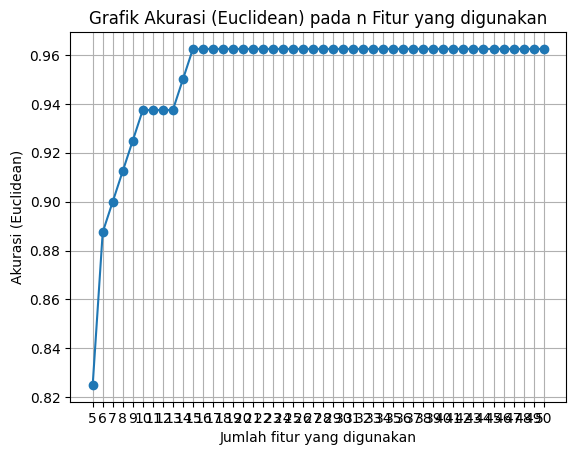

In [ ]:

akurasi_euclidean = []

for i in range(5, 51):
    accuracy_euclidean = calculate_accuracy_euclidean(bobot_proyeksi, data_testing, proyeksi, labels_testing, jumlah_citra_train, i)
    akurasi_euclidean.append(accuracy_euclidean)

# Menampilkan hasil akurasi untuk setiap iterasi
for idx, acc in enumerate(akurasi_euclidean, start=5):
    print(f"Akurasi (Euclidean) jika {idx} fitur yang digunakan: {acc * 100:.2f}%")

iterasi = list(range(5, 51))
plt.plot(iterasi, akurasi_euclidean, marker='o')
plt.title('Grafik Akurasi (Euclidean) pada n Fitur yang digunakan')
plt.xlabel('Jumlah fitur yang digunakan')
plt.ylabel('Akurasi (Euclidean)')
plt.xticks(iterasi)
plt.grid(True)
plt.show()


## $Kesimpulan$
* Akurasi tertinggi dengan minimal fitur adalah menggunakan 15 fitur dan akurasinya mencapai 96.25%
* Dapat disimpulkan juga semakin banyak fitur maka semakin tinggi akurasinya.